# Install XGBoost library (if required)

In [ ]:
#!pip install xgboost # if after installation, it doesn't work, restart the kernel and do NOT run this line anymore

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---------------------------------------- 0.8/72.0 MB 6.6 MB/s eta 0:00:11
   ---

# Loading the Required Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, roc_curve

# Loading the Dataset

In [ ]:
df_a = pd.read_csv('PCOS_data_without_infertility_tailored_cleaned.csv')
print("Initial shape:", df_a.shape)
df_a.head()

Initial shape: (536, 36)


,PCOS_Diagnosis,Age,Body_Mass_Index,Blood_Type,Pulse_Rate,Respiratory_Rate,Hemoglobin,Cycle_Regularity,Cycle_Length,Marriage_History,...,Pimples,Fast_Food,Regular_Exercise,BP_Systolic,BP_Diastolic,Follicle_Count_Left,Follicle_Count_Right,Avg_Follicle_Size_Left,Avg_Follicle_Size_Right,Endometrium_Thickness
0,0,28,19.304017,15,78,22,10.48,2,5,7.0,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,0,36,24.921163,15,74,20,11.70,2,5,11.0,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,25.270891,11,72,18,11.80,2,5,10.0,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,0,37,29.674945,13,72,20,12.00,2,5,4.0,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,20.060954,11,72,18,10.00,2,5,1.0,...,0,0,0,120,80,3,4,16.0,14.0,7.0


# Data Cleaning, Checking for Duplicates, Missing Values and Clearly Irrelevant Columns

In [ ]:
n_duplicates = df_a.duplicated().sum()
print(f"Found {n_duplicates} duplicate rows.")

Found 0 duplicate rows.


In [ ]:
print("\nMissing values per column:")
print(df_a.isnull().sum())


Missing values per column:
PCOS_Diagnosis             0
Age                        0
Body_Mass_Index            0
Blood_Type                 0
Pulse_Rate                 0
Respiratory_Rate           0
Hemoglobin                 0
Cycle_Regularity           0
Cycle_Length               0
Marriage_History           0
Pregnant                   0
Abortions                  0
Beta_HCG_1                 0
Beta_HCG_2                 0
FSH_LH_Ratio               0
Waist_Hip_Ratio            0
TSH                        0
AMH                        0
Prolactin                  0
Vitamin_D3                 0
Progesterone               0
Random_Blood_Sugar         0
Weight_Gain                0
Hair_Growth                0
Skin_Darkening             0
Hair_Loss                  0
Pimples                    0
Fast_Food                  0
Regular_Exercise           0
BP_Systolic                0
BP_Diastolic               0
Follicle_Count_Left        0
Follicle_Count_Right       0
Avg_Follicle_Si

In [ ]:
df_a.dtypes

PCOS_Diagnosis               int64
Age                          int64
Body_Mass_Index            float64
Blood_Type                   int64
Pulse_Rate                   int64
Respiratory_Rate             int64
Hemoglobin                 float64
Cycle_Regularity             int64
Cycle_Length                 int64
Marriage_History           float64
Pregnant                     int64
Abortions                    int64
Beta_HCG_1                 float64
Beta_HCG_2                 float64
FSH_LH_Ratio               float64
Waist_Hip_Ratio            float64
TSH                        float64
AMH                        float64
Prolactin                  float64
Vitamin_D3                 float64
Progesterone               float64
Random_Blood_Sugar         float64
Weight_Gain                  int64
Hair_Growth                  int64
Skin_Darkening               int64
Hair_Loss                    int64
Pimples                      int64
Fast_Food                    int64
Regular_Exercise    

# Data Preparation

In [ ]:
y = df_a['PCOS_Diagnosis']
X = df_a.drop(columns=['PCOS_Diagnosis'])

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(536, 35)

In [ ]:
nominal_features = [
    'Blood_Type', 'Cycle_Regularity', 'Pregnant', 'Weight_Gain', 'Hair_Growth', 'Skin_Darkening', 'Hair_Loss',
    'Pimples', 'Fast_Food', 'Regular_Exercise'
]

numeric_features = [
    'Age', 'Body_Mass_Index', 'Pulse_Rate', 'Respiratory_Rate', 'Hemoglobin', 'Cycle_Length',
    'Marriage_History', 'Abortions', 'Beta_HCG_1', 'Beta_HCG_2', 'FSH_LH_Ratio', 'Waist_Hip_Ratio',
    'TSH', 'AMH', 'Prolactin', 'Vitamin_D3', 'Progesterone', 'Random_Blood_Sugar', 'BP_Systolic',
    'BP_Diastolic', 'Follicle_Count_Left', 'Follicle_Count_Right', 'Avg_Follicle_Size_Left',
    'Avg_Follicle_Size_Right', 'Endometrium_Thickness'
]

In [ ]:
OHE = OneHotEncoder(drop='first', sparse=False)
X_train_nominal = OHE.fit_transform(X_train_raw[nominal_features])
X_test_nominal = OHE.transform(X_test_raw[nominal_features])

X_train_nominal_df = pd.DataFrame(X_train_nominal, columns=OHE.get_feature_names_out(nominal_features), index=X_train_raw.index)
X_test_nominal_df = pd.DataFrame(X_test_nominal, columns=OHE.get_feature_names_out(nominal_features), index=X_test_raw.index)

In [ ]:
# Concatenate all feature types
X_train_combined = pd.concat([X_train_nominal_df, X_train_raw[numeric_features]], axis=1)
X_test_combined = pd.concat([X_test_nominal_df, X_test_raw[numeric_features]], axis=1)

# Modeling

## Decision Tree

### Default Algorithm: criterion = 'gini', max_depth = None, min_samples_split = 2, min_samples_leaf = 1, class_weight = None

In [ ]:
X_train_combined

,Blood_Type_12,Blood_Type_13,Blood_Type_14,Blood_Type_15,Blood_Type_16,Blood_Type_17,Blood_Type_18,Cycle_Regularity_4,Pregnant_1,Weight_Gain_1,...,Vitamin_D3,Progesterone,Random_Blood_Sugar,BP_Systolic,BP_Diastolic,Follicle_Count_Left,Follicle_Count_Right,Avg_Follicle_Size_Left,Avg_Follicle_Size_Right,Endometrium_Thickness
347,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,36.40,0.25,100.0,120,80,4,5,15.0,18.0,8.0
440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,22.40,0.38,93.0,110,80,8,7,20.0,20.0,6.0
421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,23.80,0.25,106.0,110,80,7,3,19.0,17.0,9.0
149,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,31.20,0.39,108.0,110,80,12,14,14.0,18.0,8.0
192,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,57.08,0.40,102.0,120,80,5,6,13.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,56.45,0.79,92.0,110,80,3,1,7.5,4.5,5.4
106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,15.30,0.98,120.0,110,70,11,10,15.0,16.0,9.0
270,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.30,0.35,88.0,120,80,4,6,17.0,17.0,10.3
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,16.90,0.25,110.0,110,70,9,6,19.0,14.0,8.0


In [ ]:
#Train Decision Tree
Model1_1 = DecisionTreeClassifier(random_state=42)
Model1_1.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_1.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[69  7]
 [10 22]]
Accuracy: 0.8425925925925926
F1: 0.7213114754098361

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        76
           1       0.76      0.69      0.72        32

    accuracy                           0.84       108
   macro avg       0.82      0.80      0.81       108
weighted avg       0.84      0.84      0.84       108



In [ ]:
feature_names=X.columns
feature_names.shape

(35,)

In [ ]:
help(Model1_1)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to

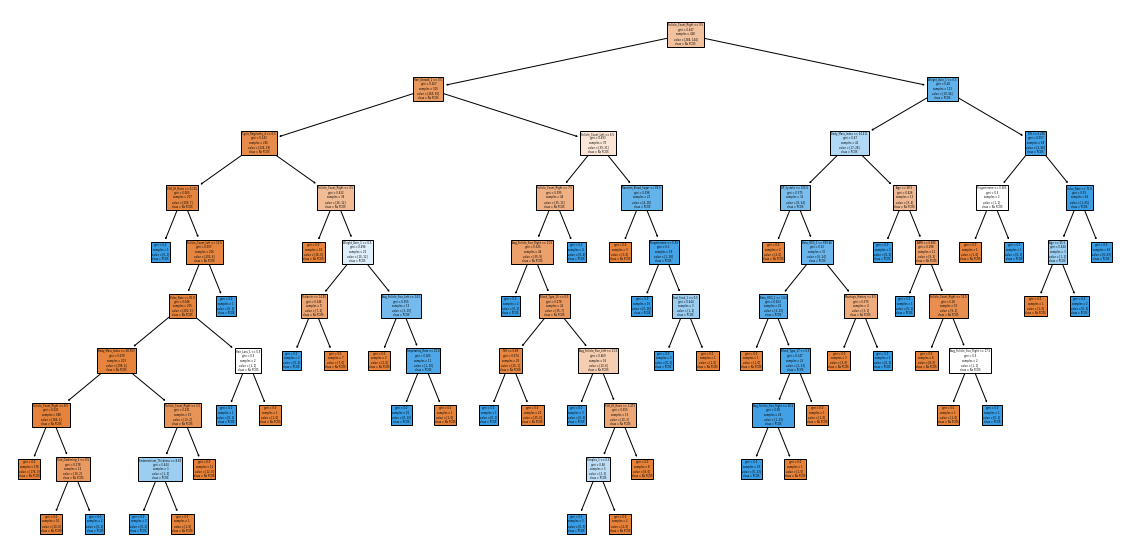

In [ ]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_1, feature_names=X_train_combined.columns, filled=True, class_names=["No PCOS", "PCOS"])
plt.show()

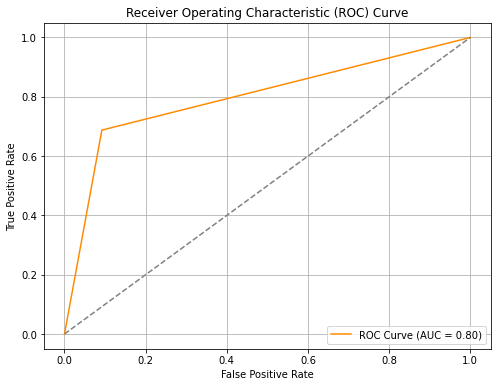

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred):.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
importances = Model1_1.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.466109
10            Hair_Growth_1    0.076038
36      Follicle_Count_Left    0.057212
9             Weight_Gain_1    0.051047
38   Avg_Follicle_Size_Left    0.029732
39  Avg_Follicle_Size_Right    0.029137
7        Cycle_Regularity_4    0.026716
33       Random_Blood_Sugar    0.024336
24               Beta_HCG_1    0.023129
26             FSH_LH_Ratio    0.021410
17          Body_Mass_Index    0.021116
16                      Age    0.018833
11         Skin_Darkening_1    0.017443
30                Prolactin    0.016280
28                      TSH    0.014839
34              BP_Systolic    0.012559
13                Pimples_1    0.012559
3             Blood_Type_15    0.011740
19         Respiratory_Rate    0.009514
5             Blood_Type_17    0.009227
32             Progesterone    0.008170
18               Pulse_Rate    0.008111
22         Marriage_History    0.007849
29                      AMH    0.007706


### Model Enhancement by criterion


The Confusion Matrix:
 [[69  7]
 [ 9 23]]
Accuracy: 0.8518518518518519
F1: 0.7419354838709677

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        76
           1       0.77      0.72      0.74        32

    accuracy                           0.85       108
   macro avg       0.83      0.81      0.82       108
weighted avg       0.85      0.85      0.85       108



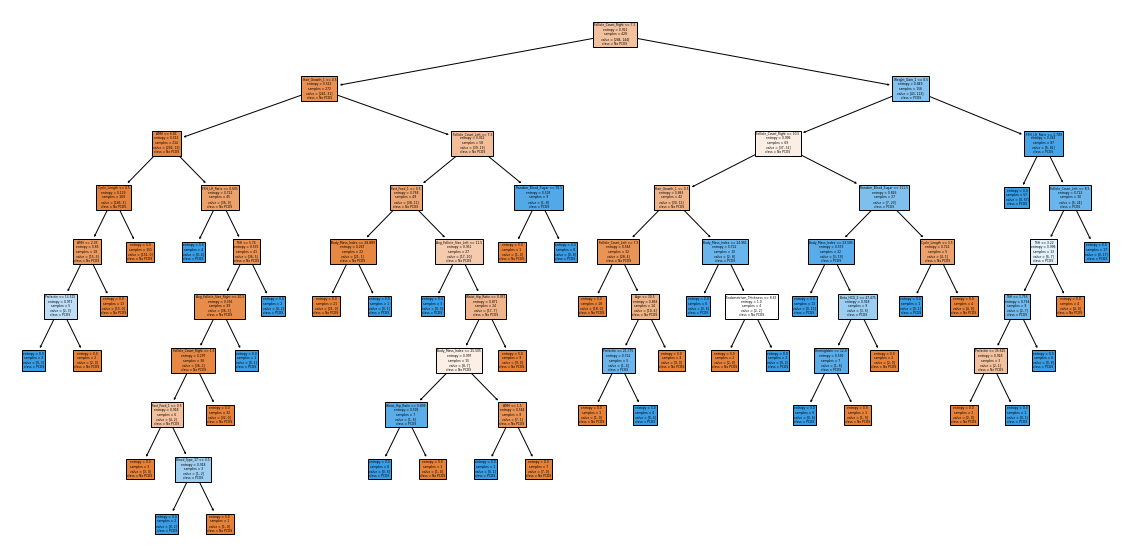

In [ ]:
#Train Decision Tree
Model1_2 = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
Model1_2.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_2.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_2, feature_names=X_train_combined.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.show()

In [ ]:
importances = Model1_2.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.351524
9             Weight_Gain_1    0.081847
10            Hair_Growth_1    0.079178
36      Follicle_Count_Left    0.062813
29                      AMH    0.060012
26             FSH_LH_Ratio    0.051717
17          Body_Mass_Index    0.050531
28                      TSH    0.042763
21             Cycle_Length    0.034605
30                Prolactin    0.028450
33       Random_Blood_Sugar    0.026803
27          Waist_Hip_Ratio    0.025588
14              Fast_Food_1    0.022457
16                      Age    0.021489
38   Avg_Follicle_Size_Left    0.012109
20               Hemoglobin    0.010503
25               Beta_HCG_2    0.010455
40    Endometrium_Thickness    0.010143
39  Avg_Follicle_Size_Right    0.010028
5             Blood_Type_17    0.006986
18               Pulse_Rate    0.000000
6             Blood_Type_18    0.000000
2             Blood_Type_14    0.000000
3             Blood_Type_15    0.000000


### Model Enhancement by class_weight


The Confusion Matrix:
 [[67  9]
 [ 8 24]]
Accuracy: 0.8425925925925926
F1: 0.7384615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89        76
           1       0.73      0.75      0.74        32

    accuracy                           0.84       108
   macro avg       0.81      0.82      0.81       108
weighted avg       0.84      0.84      0.84       108



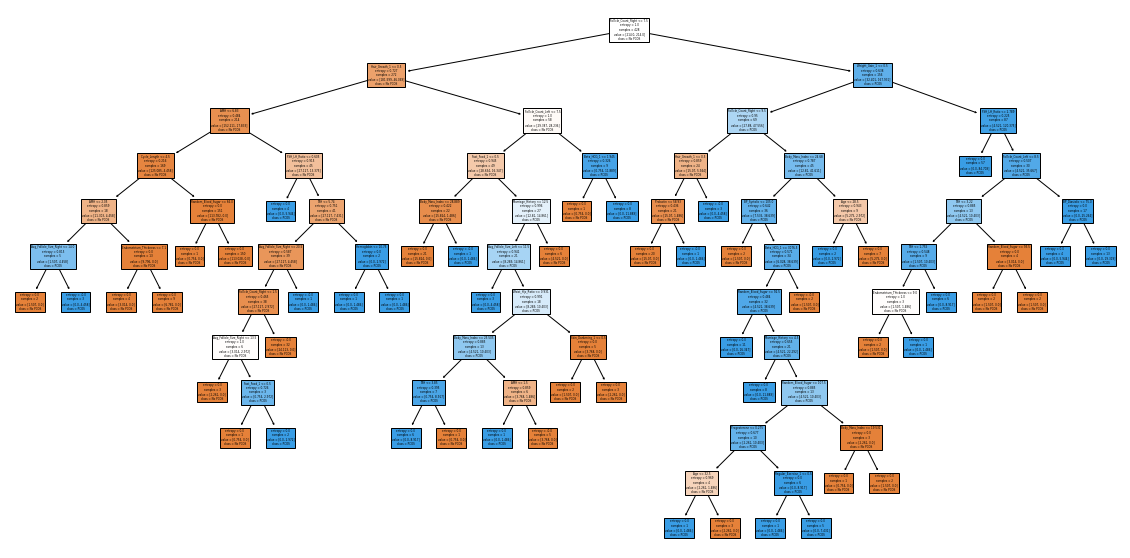

In [ ]:
#Train Decision Tree
Model1_3 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', random_state=42)
Model1_3.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_3.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_3, feature_names=X_train_combined.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.show()

In [ ]:
importances = Model1_3.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature    Importance
37     Follicle_Count_Right  3.585739e-01
10            Hair_Growth_1  8.485740e-02
29                      AMH  7.122277e-02
9             Weight_Gain_1  6.579844e-02
28                      TSH  5.007867e-02
26             FSH_LH_Ratio  4.386044e-02
36      Follicle_Count_Left  4.239293e-02
17          Body_Mass_Index  4.115635e-02
21             Cycle_Length  3.375466e-02
39  Avg_Follicle_Size_Right  2.966333e-02
16                      Age  2.665263e-02
14              Fast_Food_1  2.420855e-02
22         Marriage_History  2.364561e-02
24               Beta_HCG_1  2.040858e-02
33       Random_Blood_Sugar  1.862005e-02
30                Prolactin  1.685314e-02
27          Waist_Hip_Ratio  1.241373e-02
32             Progesterone  1.154284e-02
34              BP_Systolic  9.670925e-03
38   Avg_Follicle_Size_Left  7.632006e-03
40    Endometrium_Thickness  6.993102e-03
35             BP_Diastolic  4.727279e-17
11         Skin_Darkening_1  1.550

### max_depth Effect


The Confusion Matrix:
 [[63 13]
 [ 7 25]]
Accuracy: 0.8148148148148148
F1: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86        76
           1       0.66      0.78      0.71        32

    accuracy                           0.81       108
   macro avg       0.78      0.81      0.79       108
weighted avg       0.83      0.81      0.82       108



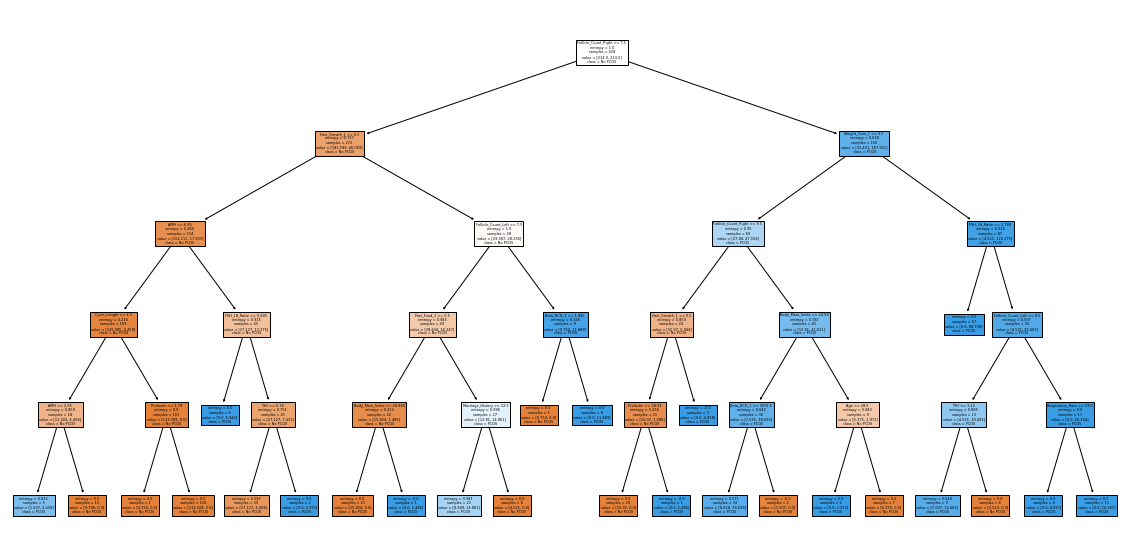

In [ ]:
#Train Decision Tree
Model1_4 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', max_depth = 5, random_state=42)
Model1_4.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_4.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_4, feature_names=X_train_combined.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.show()

In [ ]:
importances = Model1_4.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature    Importance
37     Follicle_Count_Right  4.146764e-01
10            Hair_Growth_1  1.035384e-01
9             Weight_Gain_1  8.028372e-02
29                      AMH  7.403170e-02
26             FSH_LH_Ratio  5.351615e-02
36      Follicle_Count_Left  5.172557e-02
21             Cycle_Length  4.118562e-02
28                      TSH  4.015021e-02
17          Body_Mass_Index  3.632483e-02
24               Beta_HCG_1  2.354449e-02
16                      Age  2.217063e-02
14              Fast_Food_1  2.182260e-02
30                Prolactin  2.056329e-02
22         Marriage_History  1.646633e-02
19         Respiratory_Rate  4.614377e-17
27          Waist_Hip_Ratio  0.000000e+00
0             Blood_Type_12  0.000000e+00
25               Beta_HCG_2  0.000000e+00
32             Progesterone  0.000000e+00
33       Random_Blood_Sugar  0.000000e+00
34              BP_Systolic  0.000000e+00
35             BP_Diastolic  0.000000e+00
38   Avg_Follicle_Size_Left  0.000

### min_samples_split Effect


The Confusion Matrix:
 [[67  9]
 [ 8 24]]
Accuracy: 0.8425925925925926
F1: 0.7384615384615384

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89        76
           1       0.73      0.75      0.74        32

    accuracy                           0.84       108
   macro avg       0.81      0.82      0.81       108
weighted avg       0.84      0.84      0.84       108



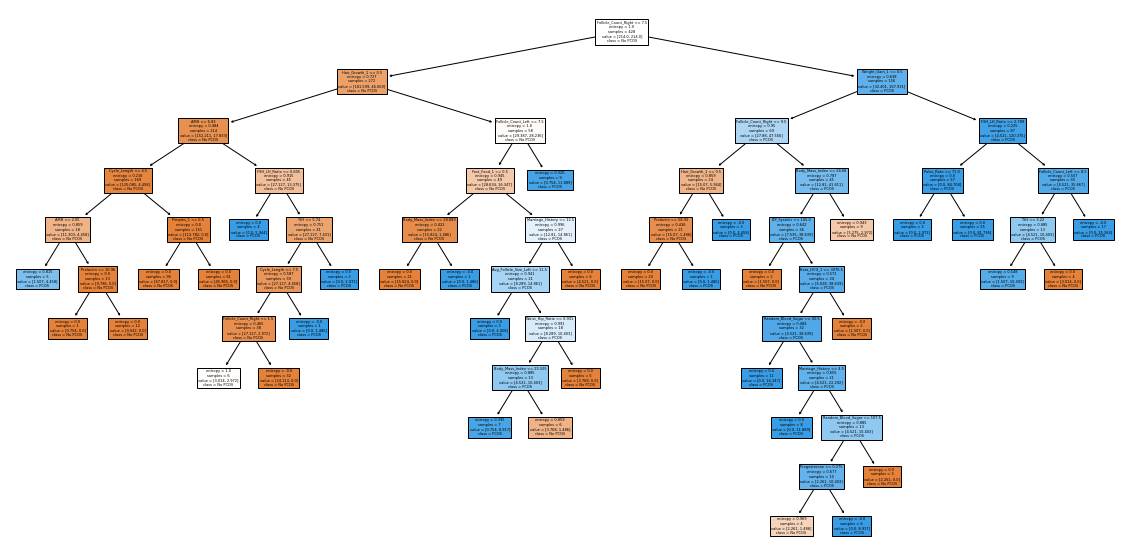

In [ ]:
#Train Decision Tree
Model1_5 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', min_samples_split = 10, random_state=42)
Model1_5.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_5.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_5, feature_names=X_train_combined.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.show()

In [ ]:
importances = Model1_5.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature    Importance
37     Follicle_Count_Right  3.968033e-01
10            Hair_Growth_1  9.390449e-02
9             Weight_Gain_1  7.281356e-02
29                      AMH  6.714328e-02
21             Cycle_Length  4.912255e-02
26             FSH_LH_Ratio  4.853664e-02
36      Follicle_Count_Left  4.691266e-02
17          Body_Mass_Index  4.554424e-02
28                      TSH  3.641436e-02
22         Marriage_History  2.616659e-02
33       Random_Blood_Sugar  2.060523e-02
14              Fast_Food_1  1.979208e-02
30                Prolactin  1.864994e-02
27          Waist_Hip_Ratio  1.373722e-02
32             Progesterone  1.277349e-02
24               Beta_HCG_1  1.193269e-02
34              BP_Systolic  1.070199e-02
38   Avg_Follicle_Size_Left  8.445694e-03
13                Pimples_1  9.424103e-17
18               Pulse_Rate  7.016068e-17
0             Blood_Type_12  0.000000e+00
25               Beta_HCG_2  0.000000e+00
35             BP_Diastolic  0.000

### min_samples_leaf Effect


The Confusion Matrix:
 [[64 12]
 [ 8 24]]
Accuracy: 0.8148148148148148
F1: 0.7058823529411765

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        76
           1       0.67      0.75      0.71        32

    accuracy                           0.81       108
   macro avg       0.78      0.80      0.79       108
weighted avg       0.82      0.81      0.82       108



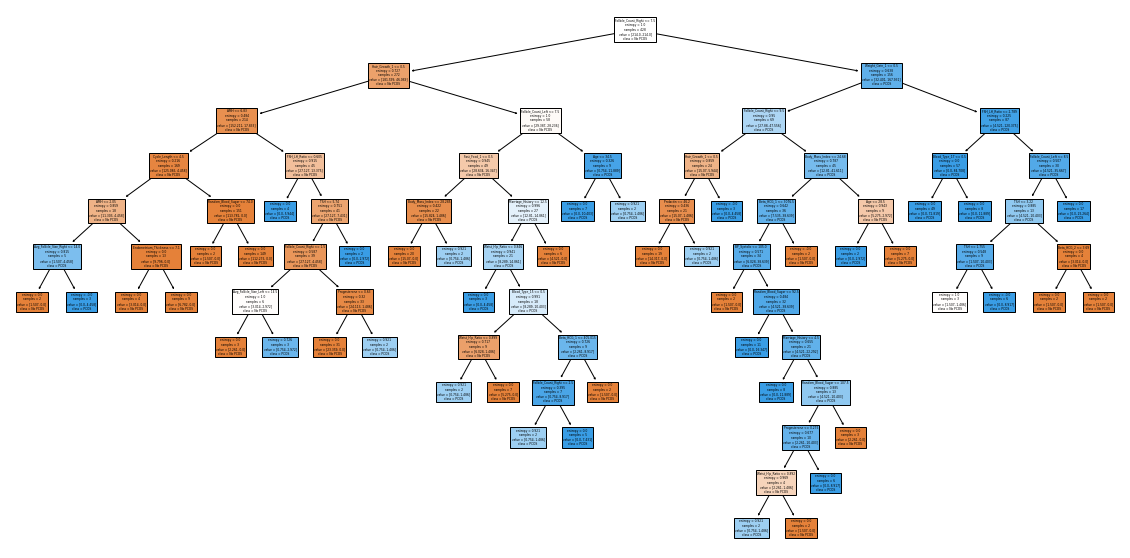

In [ ]:
#Train Decision Tree
Model1_6 = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced', min_samples_leaf = 2, random_state=42)
Model1_6.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model1_6.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(Model1_6, feature_names=X_train_combined.columns, class_names=["No PCOS", "PCOS"], filled=True)
plt.show()

In [ ]:
importances = Model1_6.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature    Importance
37     Follicle_Count_Right  3.716822e-01
10            Hair_Growth_1  8.904857e-02
9             Weight_Gain_1  6.904828e-02
29                      AMH  6.367121e-02
26             FSH_LH_Ratio  4.602674e-02
36      Follicle_Count_Left  4.448675e-02
28                      TSH  4.319110e-02
21             Cycle_Length  3.542183e-02
32             Progesterone  2.711737e-02
17          Body_Mass_Index  2.618178e-02
22         Marriage_History  2.481348e-02
16                      Age  2.410935e-02
24               Beta_HCG_1  2.069447e-02
27          Waist_Hip_Ratio  2.000921e-02
33       Random_Blood_Sugar  1.953971e-02
14              Fast_Food_1  1.876860e-02
30                Prolactin  1.262602e-02
3             Blood_Type_15  1.227987e-02
39  Avg_Follicle_Size_Right  1.192653e-02
34              BP_Systolic  1.131563e-02
38   Avg_Follicle_Size_Left  8.041364e-03
5             Blood_Type_17  6.653258e-17
40    Endometrium_Thickness  1.154

## Random Forest

### Deafult Algorithm: n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, class_weight=None

In [ ]:
#help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [ ]:
#Train Random Forest
Model2_1 = RandomForestClassifier(random_state=42)
Model2_1.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model2_1.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[75  1]
 [ 8 24]]
Accuracy: 0.9166666666666666
F1: 0.8421052631578947

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94        76
           1       0.96      0.75      0.84        32

    accuracy                           0.92       108
   macro avg       0.93      0.87      0.89       108
weighted avg       0.92      0.92      0.91       108



In [ ]:
importances = Model2_1.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.200051
36      Follicle_Count_Left    0.108966
11         Skin_Darkening_1    0.067577
10            Hair_Growth_1    0.052893
9             Weight_Gain_1    0.048269
29                      AMH    0.036806
26             FSH_LH_Ratio    0.029761
21             Cycle_Length    0.029550
17          Body_Mass_Index    0.027785
7        Cycle_Regularity_4    0.025900
30                Prolactin    0.025893
28                      TSH    0.024066
14              Fast_Food_1    0.023447
27          Waist_Hip_Ratio    0.023111
33       Random_Blood_Sugar    0.020557
22         Marriage_History    0.020445
38   Avg_Follicle_Size_Left    0.020138
40    Endometrium_Thickness    0.020027
16                      Age    0.019878
31               Vitamin_D3    0.018759
20               Hemoglobin    0.018424
13                Pimples_1    0.017993
24               Beta_HCG_1    0.017065
39  Avg_Follicle_Size_Right    0.015849


### Model Enhancement by criterion and class_weight

In [ ]:
#Train Random Forest
Model2_2 = RandomForestClassifier(criterion='entropy', class_weight='balanced', random_state=42)
Model2_2.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model2_2.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[76  0]
 [ 8 24]]
Accuracy: 0.9259259259259259
F1: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        76
           1       1.00      0.75      0.86        32

    accuracy                           0.93       108
   macro avg       0.95      0.88      0.90       108
weighted avg       0.93      0.93      0.92       108



In [ ]:
importances = Model2_2.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.172081
36      Follicle_Count_Left    0.112900
11         Skin_Darkening_1    0.055452
10            Hair_Growth_1    0.052193
9             Weight_Gain_1    0.047308
29                      AMH    0.041270
17          Body_Mass_Index    0.035355
26             FSH_LH_Ratio    0.032794
30                Prolactin    0.026934
27          Waist_Hip_Ratio    0.026474
16                      Age    0.025826
21             Cycle_Length    0.025111
7        Cycle_Regularity_4    0.024432
14              Fast_Food_1    0.024130
31               Vitamin_D3    0.024032
22         Marriage_History    0.023934
28                      TSH    0.021987
20               Hemoglobin    0.021865
39  Avg_Follicle_Size_Right    0.021424
40    Endometrium_Thickness    0.020419
33       Random_Blood_Sugar    0.020033
24               Beta_HCG_1    0.019868
38   Avg_Follicle_Size_Left    0.018663
13                Pimples_1    0.016832


### max_features Effect

In [ ]:
#Train Random Forest
Model2_3 = RandomForestClassifier(criterion='entropy',  class_weight='balanced', max_features = 'log2', random_state=42)
Model2_3.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model2_3.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[76  0]
 [ 7 25]]
Accuracy: 0.9351851851851852
F1: 0.8771929824561403

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        76
           1       1.00      0.78      0.88        32

    accuracy                           0.94       108
   macro avg       0.96      0.89      0.92       108
weighted avg       0.94      0.94      0.93       108



In [ ]:
importances = Model2_3.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.163347
36      Follicle_Count_Left    0.098809
11         Skin_Darkening_1    0.053269
10            Hair_Growth_1    0.049993
9             Weight_Gain_1    0.048925
29                      AMH    0.038866
26             FSH_LH_Ratio    0.034584
21             Cycle_Length    0.031715
17          Body_Mass_Index    0.031437
30                Prolactin    0.028446
14              Fast_Food_1    0.026477
16                      Age    0.026273
22         Marriage_History    0.025864
40    Endometrium_Thickness    0.024842
27          Waist_Hip_Ratio    0.024652
20               Hemoglobin    0.024451
38   Avg_Follicle_Size_Left    0.024132
39  Avg_Follicle_Size_Right    0.023352
28                      TSH    0.022601
31               Vitamin_D3    0.022224
33       Random_Blood_Sugar    0.020626
7        Cycle_Regularity_4    0.020080
24               Beta_HCG_1    0.019960
32             Progesterone    0.017552


## Extreme Gradient Boosting

### Default Algorithm: booster = 'gbtree', eval_metric = 'logloss', objective = 'binary:logistic', scale_pos_weight = 1

In [ ]:
Model3_1 = XGBClassifier(random_state=42)
Model3_1.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model3_1.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[72  4]
 [ 3 29]]
Accuracy: 0.9351851851851852
F1: 0.8923076923076922

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        76
           1       0.88      0.91      0.89        32

    accuracy                           0.94       108
   macro avg       0.92      0.93      0.92       108
weighted avg       0.94      0.94      0.94       108



In [ ]:
importances = Model3_1.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.164303
10            Hair_Growth_1    0.075688
9             Weight_Gain_1    0.074399
7        Cycle_Regularity_4    0.068720
1             Blood_Type_13    0.061817
11         Skin_Darkening_1    0.058441
36      Follicle_Count_Left    0.047937
3             Blood_Type_15    0.036901
33       Random_Blood_Sugar    0.031199
14              Fast_Food_1    0.028820
26             FSH_LH_Ratio    0.025123
19         Respiratory_Rate    0.022548
40    Endometrium_Thickness    0.020052
28                      TSH    0.019647
16                      Age    0.017827
24               Beta_HCG_1    0.017690
17          Body_Mass_Index    0.017202
30                Prolactin    0.017080
22         Marriage_History    0.016938
15       Regular_Exercise_1    0.016582
38   Avg_Follicle_Size_Left    0.015990
21             Cycle_Length    0.015861
29                      AMH    0.014915
8                Pregnant_1    0.014903


### Model Enhancement by scale_pos_weight

In [ ]:
class_counts = y.value_counts()
Positive_Class_Weight = class_counts[0] / class_counts[1]
print(f"Positive Class Weight: {Positive_Class_Weight}")

Positive Class Weight: 2.0454545454545454


In [ ]:
Model3_2 = XGBClassifier(scale_pos_weight = Positive_Class_Weight, random_state=42)
Model3_2.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = Model3_2.predict(X_test_combined)
print("\nThe Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


The Confusion Matrix:
 [[73  3]
 [ 4 28]]
Accuracy: 0.9351851851851852
F1: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.90      0.88      0.89        32

    accuracy                           0.94       108
   macro avg       0.93      0.92      0.92       108
weighted avg       0.93      0.94      0.93       108



In [ ]:
importances = Model3_2.feature_importances_
feature_names = X_train_combined.columns

# Create a DataFrame for easy viewing
feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

                    Feature  Importance
37     Follicle_Count_Right    0.151271
10            Hair_Growth_1    0.075809
3             Blood_Type_15    0.064876
7        Cycle_Regularity_4    0.062637
2             Blood_Type_14    0.060068
9             Weight_Gain_1    0.053999
4             Blood_Type_16    0.046855
1             Blood_Type_13    0.041874
36      Follicle_Count_Left    0.035824
39  Avg_Follicle_Size_Right    0.027341
21             Cycle_Length    0.023645
11         Skin_Darkening_1    0.023619
14              Fast_Food_1    0.022848
28                      TSH    0.021911
17          Body_Mass_Index    0.021112
16                      Age    0.020562
26             FSH_LH_Ratio    0.019105
29                      AMH    0.016689
20               Hemoglobin    0.015219
31               Vitamin_D3    0.014533
24               Beta_HCG_1    0.014062
22         Marriage_History    0.013473
38   Avg_Follicle_Size_Left    0.013113
33       Random_Blood_Sugar    0.012447
